In [ ]:
import keras 
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [ ]:
!python --version

Python 3.8.16


In [ ]:
#@title Standardtext für Titel
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/IUI/IUI-Datasets/fashion_dataset/'
image_dir  = '/content/drive/My Drive/IUI/IUI-Datasets/fashion_dataset/images/'

In [ ]:
df = pd.read_csv(data_dir + "styles.csv", nrows=40000, error_bad_lines=False) # Read n product and drop bad lines 
df['image'] = df.apply(lambda x: str(x['id']) + ".jpg", axis=1) # Make image column contains (id.jpg)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


FileNotFoundError: ignored

[Text(0, 0, 'Tshirts'),
 Text(0, 0, 'Shirts'),
 Text(0, 0, 'Casual Shoes'),
 Text(0, 0, 'Watches'),
 Text(0, 0, 'Sports Shoes'),
 Text(0, 0, 'Kurtas'),
 Text(0, 0, 'Tops'),
 Text(0, 0, 'Handbags'),
 Text(0, 0, 'Heels'),
 Text(0, 0, 'Sunglasses'),
 Text(0, 0, 'Wallets'),
 Text(0, 0, 'Flip Flops'),
 Text(0, 0, 'Sandals'),
 Text(0, 0, 'Briefs'),
 Text(0, 0, 'Belts'),
 Text(0, 0, 'Backpacks'),
 Text(0, 0, 'Socks'),
 Text(0, 0, 'Formal Shoes'),
 Text(0, 0, 'Perfume and Body Mist'),
 Text(0, 0, 'Jeans'),
 Text(0, 0, 'Shorts'),
 Text(0, 0, 'Trousers'),
 Text(0, 0, 'Flats'),
 Text(0, 0, 'Dresses'),
 Text(0, 0, 'Bra'),
 Text(0, 0, 'Sarees'),
 Text(0, 0, 'Earrings'),
 Text(0, 0, 'Nail Polish'),
 Text(0, 0, 'Deodorant'),
 Text(0, 0, 'Track Pants'),
 Text(0, 0, 'Lipstick'),
 Text(0, 0, 'Sweatshirts'),
 Text(0, 0, 'Caps'),
 Text(0, 0, 'Clutches'),
 Text(0, 0, 'Sweaters'),
 Text(0, 0, 'Jackets'),
 Text(0, 0, 'Ties'),
 Text(0, 0, 'Kurtis'),
 Text(0, 0, 'Innerwear Vests'),
 Text(0, 0, 'Tunics')]

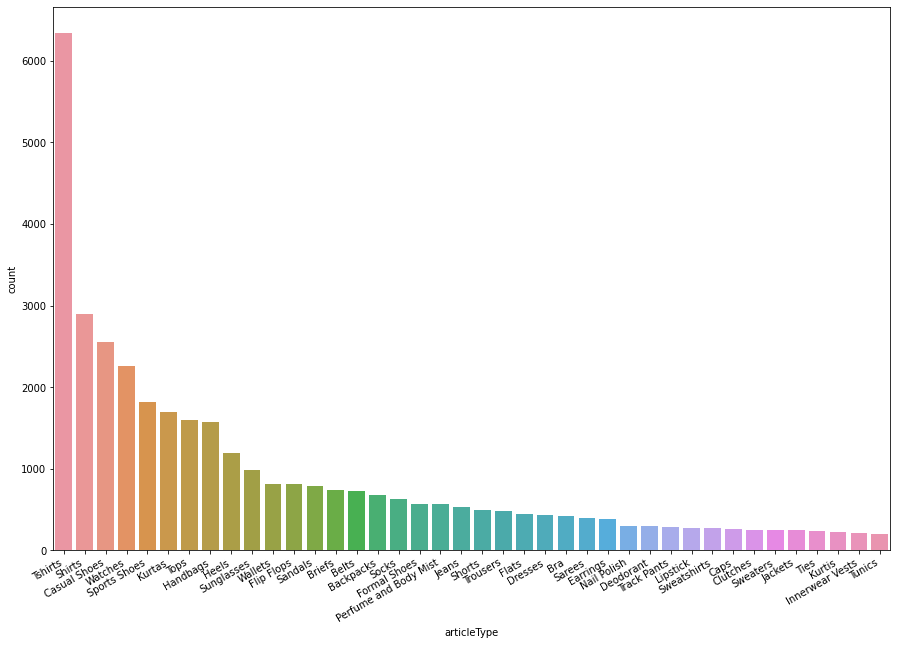

In [ ]:
plt.figure(figsize=(15,10))
chart = sns.countplot(x=df['articleType'], order=df.articleType.value_counts().iloc[:40].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')


In [ ]:
def label_data(type):
    if type in ['Shirts']:
        return 'shirts'
    elif type in ['Tshirts']:
        return 'tshirts'
    elif type in ['Track Pants','Shorts', 'Trunk', 'Trousers', 'Track Pants', 'Tights', 'Lounge Pants', 'Lounge Shorts', 'Leggings', 'Jeans', 'Jeggings']:
        return 'pants'
    elif type in ['Casual Shoes','Sports Shoes', 'Sandals', 'Flip Flops', 'Formal Shoes']:
        return 'shoes'
    elif type in ['Sweaters', 'Sweatshirts']:
        return 'sweaters'
    elif type in ['Jackets']:
        return 'jackets'
    else: 
        return ''
    

In [ ]:
df['label'] = df.apply(lambda x: label_data(x['articleType']), axis=1)


In [ ]:
df = df[df['label'] != '']

In [ ]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,label
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,shirts
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,pants
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,tshirts
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg,tshirts
...,...,...,...,...,...,...,...,...,...,...,...,...
39990,4535,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Nike Men's Incinera White Shoe,4535.jpg,shoes
39992,15162,Men,Apparel,Topwear,Tshirts,Maroon,Fall,2011.0,Casual,Arrow Sport Men Stripes Maroon Polo Tshirts,15162.jpg,tshirts
39993,33692,Men,Footwear,Shoes,Formal Shoes,Brown,Winter,2012.0,Formal,Cobblerz Men Brown Leather Semiformal Shoes,33692.jpg,shoes
39994,10410,Men,Apparel,Topwear,Tshirts,White,Fall,2011.0,Casual,United Colors of Benetton Men Solid White Tshirts,10410.jpg,tshirts


[Text(0, 0, 'shoes'),
 Text(0, 0, 'tshirts'),
 Text(0, 0, 'shirts'),
 Text(0, 0, 'pants'),
 Text(0, 0, 'sweaters'),
 Text(0, 0, 'jackets')]

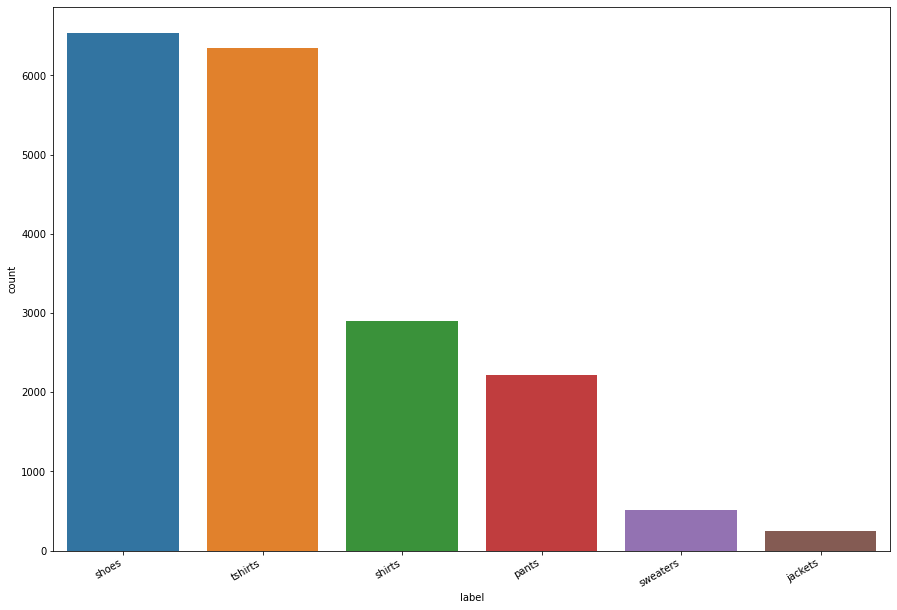

In [ ]:

plt.figure(figsize=(15,10))
chart = sns.countplot(x=df['label'], order=df['label'].value_counts().iloc[:6].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')

In [ ]:
df['label'].value_counts().min()

243

In [ ]:
# df= df.groupby('label').apply(lambda x: x.sample(df['label'].value_counts().min()))
frames = []
labels = df['label'].unique()

for i in labels:
    g = df[df['label'] == i].sample(df['label'].value_counts().min())
    frames.append(g)

df = pd.concat(frames)

In [ ]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,label
2134,8940,Men,Apparel,Topwear,Shirts,Red,Fall,2011.0,Casual,Indigo Nation Men Reversible Bling Red Shirts,8940.jpg,shirts
32420,14514,Men,Apparel,Topwear,Shirts,Brown,Fall,2011.0,Formal,Mark Taylor Men Brown & White Striped Shirt,14514.jpg,shirts
10195,27562,Men,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Scullers Men Checked Purple Shirt,27562.jpg,shirts
16202,11048,Men,Apparel,Topwear,Shirts,Red,Fall,2011.0,Casual,Scullers Men Check Red Shirts,11048.jpg,shirts
29769,20140,Men,Apparel,Topwear,Shirts,White,Summer,2012.0,Casual,Wrangler Men Check White Shirt,20140.jpg,shirts
...,...,...,...,...,...,...,...,...,...,...,...,...
30933,13105,Men,Apparel,Topwear,Jackets,Black,Fall,2011.0,Sports,ADIDAS Men Ess 3s Rainjkt Black Jackets,13105.jpg,jackets
27747,31317,Women,Apparel,Topwear,Jackets,Teal,Summer,2012.0,Casual,W Women Teal Jacket,31317.jpg,jackets
3300,16190,Men,Apparel,Topwear,Jackets,Navy Blue,Fall,2011.0,Sports,Puma Men Heroes Navy Blue Jackets,16190.jpg,jackets
13531,8477,Women,Apparel,Topwear,Jackets,Blue,Fall,2011.0,Casual,Forever New Women Washed Blue Jacket,8477.jpg,jackets


[Text(0, 0, 'shirts'),
 Text(0, 0, 'pants'),
 Text(0, 0, 'tshirts'),
 Text(0, 0, 'shoes'),
 Text(0, 0, 'sweaters'),
 Text(0, 0, 'jackets')]

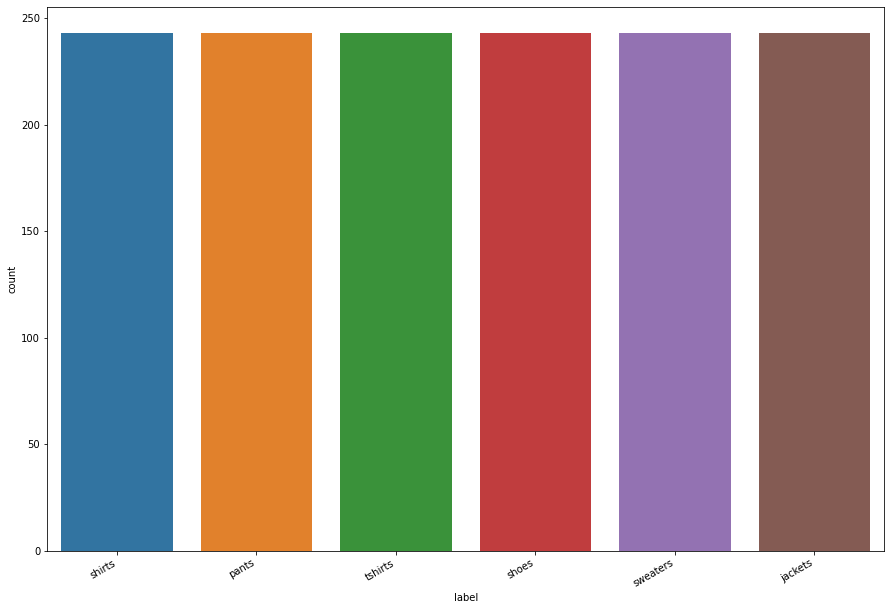

In [ ]:
plt.figure(figsize=(15,10))
chart = sns.countplot(x=df['label'], order=df['label'].value_counts().iloc[:6].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
batch_size = 32


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an image generator object for data augmentation
image_generator = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

# Create a generator for the training data
training_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col="image",
    y_col="label",
    target_size=(224, 224),
    batch_size=batch_size,
    subset="training",
    shuffle=True
)

# Create a generator for the validation data
validation_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col="image",
    y_col="label",
    target_size=(224, 224),
    batch_size=batch_size,
    subset="validation",
    shuffle=True
)

# Get the number of classes from the training generator
classes = len(training_generator.class_indices)

Found 1167 validated image filenames belonging to 6 classes.
Found 291 validated image filenames belonging to 6 classes.


In [ ]:
training_generator.class_indices

{'jackets': 0,
 'pants': 1,
 'shirts': 2,
 'shoes': 3,
 'sweaters': 4,
 'tshirts': 5}

In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False
 
x = Flatten()(vgg.output)
prediction = Dense(classes, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history = model.fit(training_generator, epochs=20, validation_data=validation_generator) 

Epoch 1/20
37/37 [==============================] - 673s 18s/step - loss: 0.9604 - accuracy: 0.6530 - val_loss: 0.4884 - val_accuracy: 0.8110
Epoch 2/20
37/37 [==============================] - 19s 506ms/step - loss: 0.3339 - accuracy: 0.8783 - val_loss: 0.3803 - val_accuracy: 0.8488
Epoch 3/20
37/37 [==============================] - 19s 505ms/step - loss: 0.2806 - accuracy: 0.8972 - val_loss: 0.2853 - val_accuracy: 0.9107
Epoch 4/20
37/37 [==============================] - 19s 517ms/step - loss: 0.2381 - accuracy: 0.9126 - val_loss: 0.2369 - val_accuracy: 0.9107
Epoch 5/20
37/37 [==============================] - 19s 503ms/step - loss: 0.1796 - accuracy: 0.9409 - val_loss: 0.2860 - val_accuracy: 0.8797
Epoch 6/20
37/37 [==============================] - 19s 504ms/step - loss: 0.1614 - accuracy: 0.9486 - val_loss: 0.2847 - val_accuracy: 0.8969
Epoch 7/20
37/37 [==============================] - 19s 504ms/step - loss: 0.1737 - accuracy: 0.9272 - val_loss: 0.3026 - val_accuracy: 0.8832


In [ ]:
vgg_path  = '/content/drive/My Drive/IUI/vit_model.h5'

In [ ]:
model.save(vgg_path)

In [ ]:
model

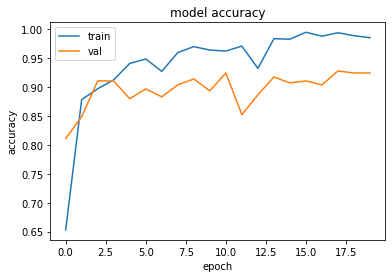

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
validation_generator.class_indices

{'jackets': 0,
 'pants': 1,
 'shirts': 2,
 'shoes': 3,
 'sweaters': 4,
 'tshirts': 5}

1/1 [==============================] - 1s 807ms/step


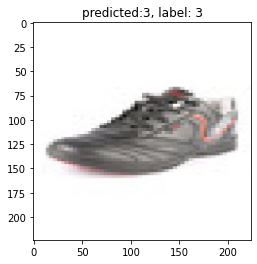

1/1 [==============================] - 0s 16ms/step


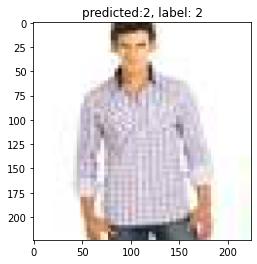

1/1 [==============================] - 0s 20ms/step


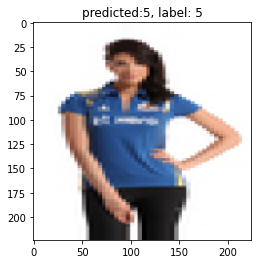

1/1 [==============================] - 0s 17ms/step


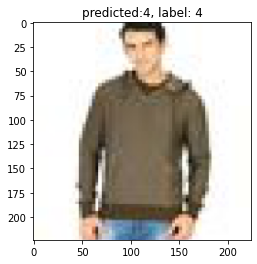

1/1 [==============================] - 0s 17ms/step


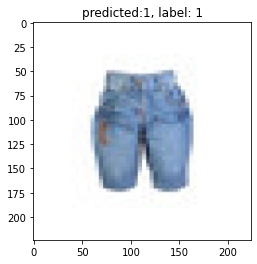

1/1 [==============================] - 0s 20ms/step


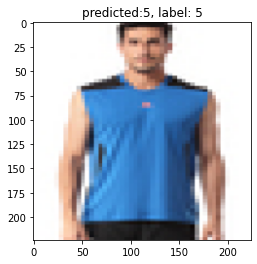

1/1 [==============================] - 0s 16ms/step


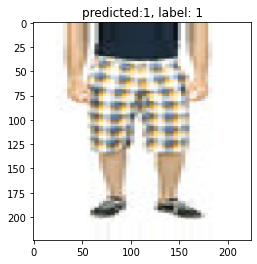

1/1 [==============================] - 0s 16ms/step


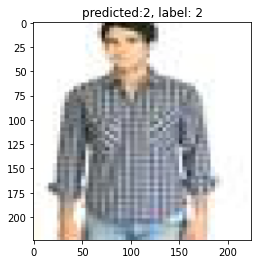

1/1 [==============================] - 0s 17ms/step


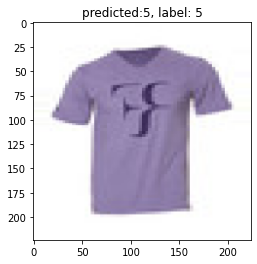

1/1 [==============================] - 0s 16ms/step


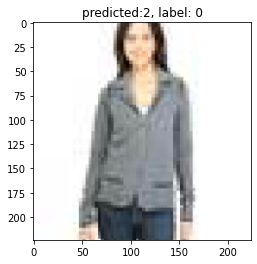

In [ ]:
for i in range(10):
  image, label = validation_generator.next()
  plt.imshow(image[0])
  plt.title(f'predicted:{model.predict(np.expand_dims(image[0], axis=0)).argmax()}, label: {label[0].argmax()}')
  plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

classifier_model = "https://tfhub.dev/sayakpaul/vit_b8_classification/1"
model = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape= IMAGE_SIZE + [3])
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              86576872  
                                                                 
Total params: 86,576,872
Trainable params: 0
Non-trainable params: 86,576,872
_________________________________________________________________


In [ ]:
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(classes, activation="softmax")(x)
model = tf.keras.Model(inputs=model.input, outputs=predictions)

model.summary()

# Freeze the weights of the pre-trained layers
for layer in model.layers[:-3]:
    layer.trainable = False

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model on your dataset
history = model.fit(training_generator, epochs=20, validation_data=validation_generator)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_input (InputLay  [(None, 224, 224, 3)]    0         
 er)                                                             
                                                                 
 keras_layer (KerasLayer)    (None, 1000)              86576872  
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1025024   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 6150      
                                                           

In [ ]:
vit_path  = '/content/drive/My Drive/IUI/vit_model'

In [ ]:
model.save(vit_path)

In [ ]:
model

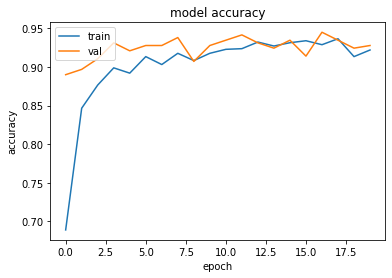

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 5s 5s/step


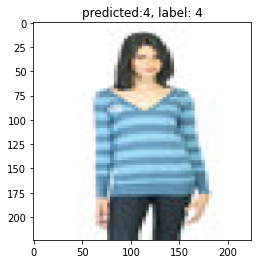

1/1 [==============================] - 0s 17ms/step


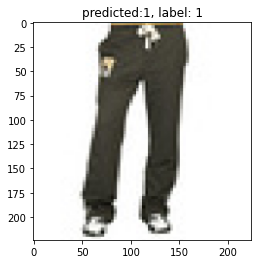

1/1 [==============================] - 0s 19ms/step


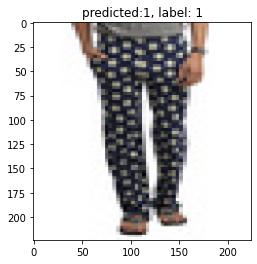

1/1 [==============================] - 0s 19ms/step


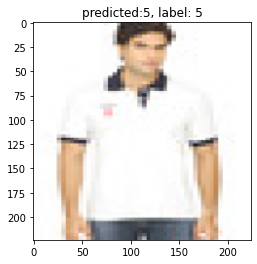

1/1 [==============================] - 0s 17ms/step


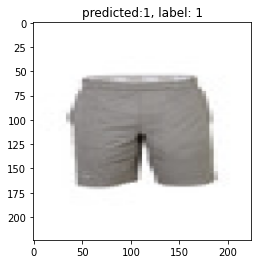

1/1 [==============================] - 0s 20ms/step


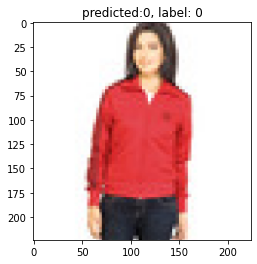

1/1 [==============================] - 0s 17ms/step


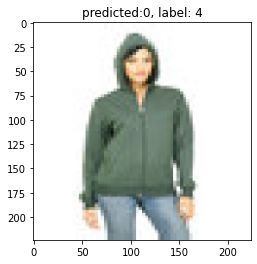

1/1 [==============================] - 0s 17ms/step


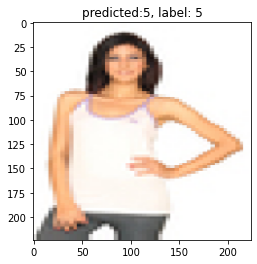

1/1 [==============================] - 0s 18ms/step


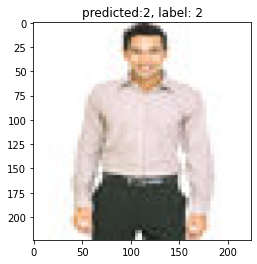

1/1 [==============================] - 0s 24ms/step


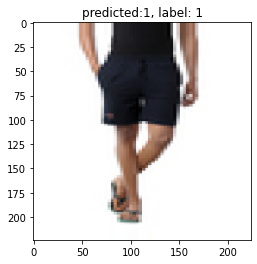

In [ ]:
for i in range(10):
  image, label = validation_generator.next()
  plt.imshow(image[0])
  plt.title(f'predicted:{model.predict(np.expand_dims(image[0], axis=0)).argmax()}, label: {label[0].argmax()}')
  plt.show()

In [ ]:
vit_path

'/content/drive/My Drive/IUI/vit_model'

In [ ]:
loaded_model = loaded_model = tf.keras.models.load_model(vit_path)

1/1 [==============================] - 5s 5s/step


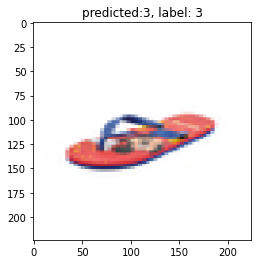

1/1 [==============================] - 0s 19ms/step


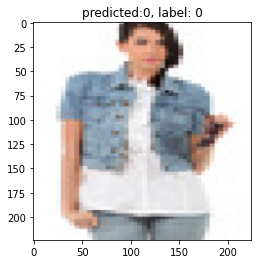

1/1 [==============================] - 0s 21ms/step


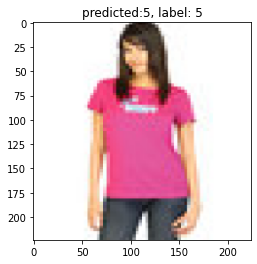

1/1 [==============================] - 0s 18ms/step


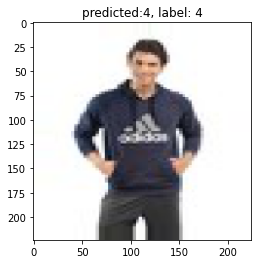

1/1 [==============================] - 0s 19ms/step


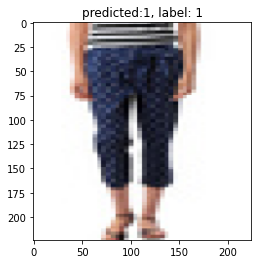

1/1 [==============================] - 0s 18ms/step


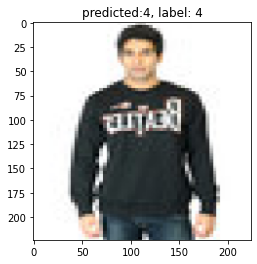

1/1 [==============================] - 0s 18ms/step


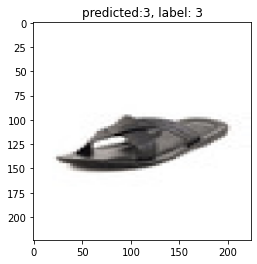

1/1 [==============================] - 0s 18ms/step


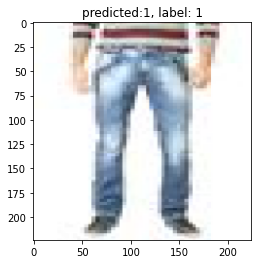

1/1 [==============================] - 0s 17ms/step


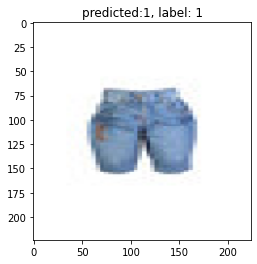

1/1 [==============================] - 0s 17ms/step


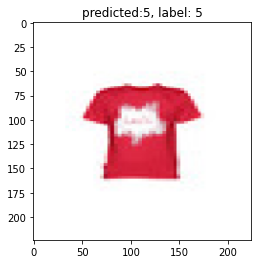

In [ ]:
for i in range(10):
  image, label = validation_generator.next()
  plt.imshow(image[0])
  plt.title(f'predicted:{loaded_model.predict(np.expand_dims(image[0], axis=0)).argmax()}, label: {label[0].argmax()}')
  plt.show()